In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride = pd.merge(ride, city, on = "city", how = "inner", suffixes = ("_ride", "_city"))
city_ride.describe()

# Display the data table for preview
city_ride.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

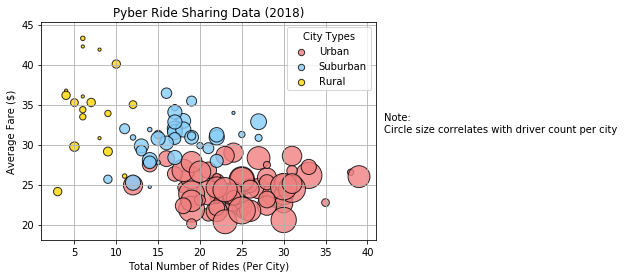

In [3]:
by_city = city_ride.groupby(["city","type"])

ride_count = by_city.count()
avg_fare = by_city.mean()

bubble = avg_fare[["driver_count", "fare"]]
bubble["total_rides"] = ride_count["ride_id"]
bubble = bubble.reset_index()


# Obtain the x and y coordinates for each of the three city types
x_urban = bubble.loc[(bubble["type"] == "Urban"), "total_rides"]
x_suburban = bubble.loc[(bubble["type"] == "Suburban"), "total_rides"]
x_rural = bubble.loc[(bubble["type"] == "Rural"), "total_rides"]

urban_fare = bubble.loc[(bubble["type"] == "Urban"), "fare"]
suburban_fare = bubble.loc[(bubble["type"] == "Suburban"), "fare"]
rural_fare = bubble.loc[(bubble["type"] == "Rural"), "fare"]

urban_drivers = bubble.loc[(bubble["type"] == "Urban"), "driver_count"]
suburban_drivers = bubble.loc[(bubble["type"] == "Suburban"), "driver_count"]
rural_drivers = bubble.loc[(bubble["type"] == "Rural"), "driver_count"]

# Build the scatter plots for each city types
plt.scatter(x_urban, urban_fare, marker="o", facecolors="lightcoral", edgecolors = "black", alpha = .8,
            s = urban_drivers*10, label = "Urban")
plt.scatter(x_suburban, suburban_fare, marker="o", facecolors="lightskyblue", edgecolors = "black", alpha = .8,
            s = suburban_drivers*10, label = "Suburban")
plt.scatter(x_rural, rural_fare, marker="o", facecolors="gold", edgecolors = "black", alpha = .8,
            s = rural_drivers*10, label = "Rural")

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.xlim(min(bubble["total_rides"] - 2),max(bubble["total_rides"] + 2))
plt.ylim(min(bubble["fare"] - 2),max(bubble["fare"] + 2))

# Create a legend
lgnd = plt.legend(loc = 'best', title = "City Types")
for handle in lgnd.legendHandles:
    handle.set_sizes([40])
lgnd.get_title().set_fontsize('10')

# Incorporate a text label regarding circle size
plt.figtext(.92, .5, "Note: \nCircle size correlates with driver count per city", horizontalalignment='left',
            fontsize=10, multialignment='left')


plt.savefig("Images/Pyber_Ride_Sharing_Data_2018.png")

plt.show()

## Total Fares by City Type

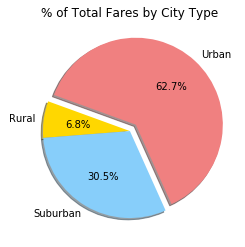

In [5]:
# Calculate Type Percents
by_type = city_ride.groupby(["type"])
type_count = by_type["fare"].sum()

# Build Pie Chart
count_chart = type_count.plot(kind='pie', colors = ["gold", "lightskyblue", "lightcoral"], explode = (0,0,.1),
                              shadow=True, startangle=160, autopct='%1.1f%%')

plt.axis("off")
plt.title("% of Total Fares by City Type")



# Save Figure
plt.show()



## Total Rides by City Type

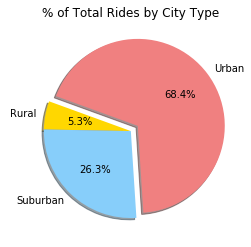

In [6]:
# Calculate Ride Percents
by_type = city_ride.groupby(["type"])
type_count = by_type["ride_id"].count()

# Build Pie Chart
count_chart = type_count.plot(kind='pie', colors = ["gold", "lightskyblue", "lightcoral"], explode = (0,0,.1),
                              shadow=True, startangle=160, autopct='%1.1f%%')

plt.axis("off")
plt.title("% of Total Rides by City Type")



# Save Figure
plt.show()

## Total Drivers by City Type

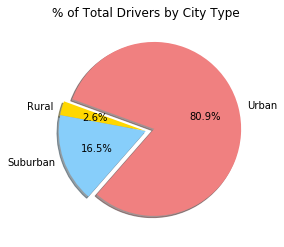

In [7]:
# Calculate Driver Percents
by_type = bubble.groupby(["type"])
type_count = by_type["driver_count"].sum()

# Build Pie Chart
count_chart = type_count.plot(kind='pie', colors = ["gold", "lightskyblue", "lightcoral"], explode = (0,0,.1),
                              shadow=True, startangle=160, autopct='%1.1f%%')

plt.axis("off")
plt.title("% of Total Drivers by City Type")



# Save Figure
plt.show()

## Findings

There were a few findings in this dataset that became evident after doing the analysis.  First, urban settings typically have the most drivers working, suburban settings have less than this, and rural places have the least drivers working.  This could either indicate the people living in those places do not find much of a need for the ride-sharing services, or drivers don't want to work there because they won't make as much; this brings me to the next finding.

Rides in rural places typically cost more than rides in subrurban or urban areas.  The rides could be longer distances, or the lack of drivers could play into the pricing formula for Pyber.  Overall, cities with more divers and more of a need for ride-sharing services have cheaper average fares.  

A third finding, which relates to the last one, is when looking at the pie charts, we can see that even though 80.9% of all drivers work in urban settings, and 68.4% of all rides occur these urban places, the total fares paid for urban-setting customers accounts for 62.7% of the total in this dataset.  This proves there's a relationship between drivers, demand, and setting, and how those factors relate to fare cost.